In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Прямая задача

In [4]:
def generate_3d_coord(range = 20):
    return np.random.rand(3) * range

In [5]:
def generate_2d_coord(range = 20):
    return np.random.rand(2) * range

In [6]:
a1 = generate_3d_coord()
print(a1)
a2 = generate_3d_coord()
print(a2)
a3 = generate_3d_coord()
print(a3)

[15.54406298  2.47288373 18.35423177]
[5.55326853 0.18102915 3.56012701]
[18.70248969 17.27846787  1.91191064]


In [7]:
def solve_plane_eq(a1, a2, a3):
    a = np.array([a1, a2, a3])
    b = [-1, -1, -1]
    x = np.linalg.solve(a, b)
    return x

In [8]:
def get_plane_point(plane_coefs):
    point = generate_2d_coord()
    point_z = (-1 - plane_coefs[1] * point[1] - plane_coefs[0] * point[0]) / plane_coefs[2]
    point = np.append(point, [point_z])
    return point

In [9]:
plane_coefs = solve_plane_eq(a1, a2, a3)
print(plane_coefs)

[-0.2895576   0.23798828  0.15867644]


In [10]:
a4 = get_plane_point(plane_coefs)
print(a4)

[9.20707717 1.0744457  8.88773185]


In [11]:
a5 = generate_3d_coord()
print(a5)

[14.92076458  5.95681284 16.24226204]


In [12]:
plane_coefs2 = solve_plane_eq(a1, a3, a5)
print(plane_coefs2)
a6 = get_plane_point(plane_coefs2)
print(a6)

[-0.03182022 -0.02069448 -0.02474685]
[ 1.51636044 10.1376966  29.98178416]


In [13]:
plane_coefs3 = solve_plane_eq(a1, a2, a5)
print(plane_coefs3)
a7 = get_plane_point(plane_coefs3)
print(a7)

[-0.30987637  0.06528787  0.19915235]
[16.3158349  19.88278507 13.84762452]


In [14]:
a8 = solve_plane_eq(plane_coefs, plane_coefs2, plane_coefs3)
print(a8)

[15.54406298  2.47288373 18.35423177]


In [15]:
a1 = [0, 0, 1]
a2 = [1, 0, 1]
a3 = [0, 1, 1]
a4 = [1, 1, 1]
a5 = [0, 0, 0]
a6 = [0, 1, 0]
a7 = [1, 0, 0]
a8 = [1, 1, 0]

In [16]:
X = [a1[0], a2[0], a3[0], a4[0], a5[0], a6[0], a7[0], a8[0]]
Y = [a1[1], a2[1], a3[1], a4[1], a5[1], a6[1], a7[1], a8[1]]
Z = [a1[2], a2[2], a3[2], a4[2], a5[2], a6[2], a7[2], a8[2]]

In [17]:
def plot_3d(X, Y, Z, times = 1):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(X, Y, Z)
    for i in range(times):
        v = i * 8
        ax.plot([X[v + 0], X[v + 1]], [Y[v + 0],Y[v + 1]],zs=[Z[v + 0],Z[v + 1]])
        ax.plot([X[v + 0], X[v + 2]], [Y[v + 0],Y[v + 2]],zs=[Z[v + 0],Z[v + 2]])
        ax.plot([X[v + 3], X[v + 2]], [Y[v + 3],Y[v + 2]],zs=[Z[v + 3],Z[v + 2]])
        ax.plot([X[v + 3], X[v + 1]], [Y[v + 3],Y[v + 1]],zs=[Z[v + 3],Z[v + 1]])

        ax.plot([X[v + 0], X[v + 4]], [Y[v + 0],Y[v + 4]],zs=[Z[v + 0],Z[v + 4]])
        ax.plot([X[v + 5], X[v + 4]], [Y[v + 5],Y[v + 4]],zs=[Z[v + 5],Z[v + 4]])
        ax.plot([X[v + 5], X[v + 2]], [Y[v + 5],Y[v + 2]],zs=[Z[v + 5],Z[v + 2]])

        ax.plot([X[v + 6], X[v + 4]], [Y[v + 6],Y[v + 4]],zs=[Z[v + 6],Z[v + 4]])
        ax.plot([X[v + 6], X[v + 1]], [Y[v + 6],Y[v + 1]],zs=[Z[v + 6],Z[v + 1]])

        ax.plot([X[v + 6], X[v + 7]], [Y[v + 6],Y[v + 7]],zs=[Z[v + 6],Z[v + 7]])
        ax.plot([X[v + 3], X[v + 7]], [Y[v + 3],Y[v + 7]],zs=[Z[v + 3],Z[v + 7]])
        ax.plot([X[v + 5], X[v + 7]], [Y[v + 5],Y[v + 7]],zs=[Z[v + 5],Z[v + 7]])

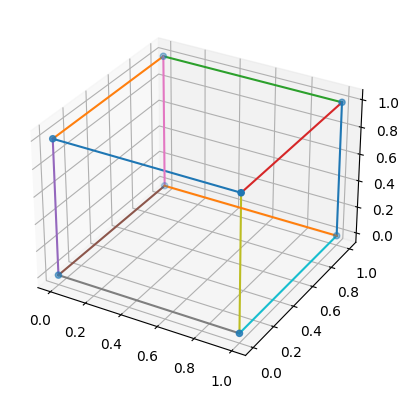

In [18]:
plot_3d(X, Y, Z)

In [19]:
V = generate_3d_coord(3)
print(V)

[1.33807083 1.52382013 1.96882315]


In [20]:
def move_points(X, Y, Z, move_vector):
    X_new = []
    Y_new = []
    Z_new = []
    for i in range(8):
        X_new.append(X[i] + move_vector[0])
        Y_new.append(Y[i] + move_vector[1])
        Z_new.append(Z[i] + move_vector[2])
    return X_new, Y_new, Z_new

In [21]:
X2, Y2, Z2 = move_points(X, Y, Z, V)
x = np.append(X, X2)
y = np.append(Y, Y2)
z = np.append(Z, Z2)
frames = 5
for i in range(frames - 2):
    X2, Y2, Z2 = move_points(X2, Y2, Z2, V)
    x = np.append(x, X2)
    y = np.append(y, Y2)
    z = np.append(z, Z2)

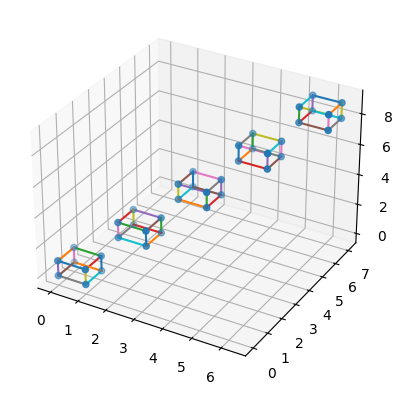

In [22]:
plot_3d(x, y, z, 5)

In [23]:
# camera = [0, 0, 0]
# o_x = 45
# o_y = 45
# o_z = 45
# matrix_1 = np.array([[1, 0, 0],[0, np.cos(o_x), np.sin(o_x)], [0, -np.sin(o_x), np.cos(o_x)]])

# matrix_2 = np.array([[np.cos(o_y), 0, -np.sin(o_y)],[0, 1, 0], [np.sin(o_y), 0, np.cos(o_y)]])

# matrix_3 = np.array([[np.cos(o_z), np.sin(o_z), 0], [-np.sin(o_z), np.cos(o_z), 0], [0, 0, 1]])

# P = np.matmul(np.matmul(matrix_1, matrix_2), matrix_3)


In [24]:
# X_2d = []
# Y_2d = []
# f = 1
# for i in range(8 * 4):
#     tmp = np.array([x[i], y[i], z[i]])
#     proj = np.matmul(P, tmp)
#     # print(proj)
#     X_2d.append(f / (proj[2] + 1e-10) * proj[0])
#     Y_2d.append(f / (proj[2] + 1e-10) * proj[2])
#     # X_2d.append((x[i] * np.cos(a)) + (z[i] * np.sin(a)))
#     # Y_2d.append((x[i] * np.sin(a) * np.cos(b)) + (y[i] * np.cos(b)) - (z[i] * np.cos(a) * np.sin(b)))

In [25]:
# plt.scatter(X_2d, Y_2d, c ="blue")
# plt.show()

In [26]:

X_2d = []
Y_2d = []
distance_to_camera = 3
a = 45
b = 45

for j in range(5):
    min_ = 500
    min_i = -1
    for i in range(8):
        z_2d = (-x[8 * j +i] * np.sin(a) * np.cos(b)) + (y[8 * j +i] * np.sin(b)) + (z[8 * j +i] * np.cos(a) * np.cos(b))
        
        if (z_2d < min_):
            min_ = z_2d
            min_i = i

    print(min_)
    print(min_i)   

    for i in range(8):
        if i == min_i:
            continue

        if i == 10:
            continue
        X_2d.append((x[8 * j +i] * np.cos(a)) + (z[8 * j +i] * np.sin(a)))
        Y_2d.append((x[8 * j +i] * np.sin(a) * np.cos(b)) + (y[8 * j +i] * np.cos(b)) - (z[8 * j +i] * np.cos(a) * np.sin(b)))

    
        # X_2d.append(x[i] / (z[i] + 1e-15) * distance_to_camera)
        # Y_2d.append(y[i] / (z[i] + 1e-15) * distance_to_camera)

-0.446998331800279
6
0.7948328791246995
6
2.036664090049678
6
3.2784953009746554
6
4.5203265118996345
6


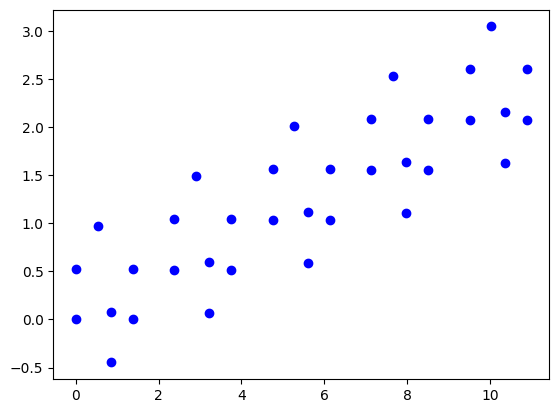

In [27]:
plt.scatter(X_2d, Y_2d, c ="blue")
plt.show()

Обратная Задача

In [28]:
print(X_2d)
print(Y_2d)

[0.8509035245341184, 1.3762255133518482, 0.8509035245341184, 1.3762255133518482, 0.0, 0.0, 0.5253219888177297, 3.229100108652521, 3.7544220974702505, 3.229100108652521, 3.7544220974702505, 2.378196584118403, 2.378196584118403, 2.9035185729361324, 5.607296692770924, 6.132618681588654, 5.607296692770924, 6.132618681588654, 4.756393168236806, 4.756393168236806, 5.281715157054536, 7.985493276889327, 8.510815265707057, 7.985493276889327, 8.510815265707057, 7.134589752355209, 7.134589752355209, 7.659911741172939, 10.36368986100773, 10.88901184982546, 10.36368986100773, 10.88901184982546, 9.512786336473612, 9.512786336473612, 10.038108325291342]
[-0.446998331800279, 0.0, 0.07832365701745075, 0.5253219888177296, 0.0, 0.5253219888177297, 0.9723203206180087, 0.07155265900005059, 0.5185509908003294, 0.5968746478177804, 1.0438729796180595, 0.5185509908003294, 1.0438729796180592, 1.4908713114183383, 0.5901036498003802, 1.0371019816006588, 1.11542563861811, 1.5624239704183887, 1.0371019816006588, 1.

In [29]:
def write_data(filename, data):
    with open(filename, 'w') as filehandle:
        for listitem in data:
            filehandle.write(f'{listitem}\n')

In [30]:
buffer_x = []
for j in range(5):
    for i in range(7):
        if (i == 0 or i == 2 or i == 4):
            buffer_x.append(X_2d[7 * j + i])

buffer_y = []
for j in range(5):
    for i in range(7):
        if (i == 0 or i == 2 or i == 4):
            buffer_y.append(Y_2d[7 * j + i])
        

write_data("x_2d.txt", buffer_x)
write_data("y_2d.txt", buffer_y)

In [31]:
a = [8.870634744, 0.8612110261, -7.900030113, -9.934967365, 1.665156335, -1.604685243, -2.067735756, 3.557445787, 1.142250477, 0.283532639, 0.09248219515, 9.786268336, 2.118219459, -7.648967451, -2.711930228, 1.694991607, 7.862062073, 2.221644345e-05, 2.725759161, 3.487500933, 0.680543948, 2.887249277, 2.328820373, 2.238266428 ]

In [32]:
P = np.array([[a[0], a[1], a[2], a[3]], [a[4], a[5], a[6], a[7]], [a[8], a[9], a[10], a[11]]])
V = np.array([a[12], a[13], a[14]])

X_a = np.array([a[15], a[16], a[17]])
X_e = np.array([a[18], a[19], a[20]])
X_j = np.array([a[21], a[22], a[23]])

In [33]:
def solve_coord_eq(a1, a2, a3, b1, b2, b3):
    a = np.array([a1, a2, a3])
    b = [b1, b2, b3]
    x = np.linalg.solve(a, b)
    return x

In [34]:
res_x = []
res_y = []
res_z = []
for i in range(7):
    x1 = X_2d[i]
    y1 = Y_2d[i]
    x2 = X_2d[i + 7]

    a1 = [x1*P[2][0] - P[0][0], x1*P[2][1] - P[0][1], x1*P[2][2] - P[0][2]]
    b1 = P[0][3] - x1*P[2][2]

    a2 = [y1*P[2][0] - P[1][0], y1*P[2][1] - P[1][1], y1*P[2][2] - P[1][2]]
    b2 = P[1][3] - y1*P[2][2]

    a3 = [x2*P[2][0] - P[0][0], x2*P[2][1] - P[0][1], x2*P[2][2] - P[0][2]]
    b3 = P[0][3] - x2*P[2][2] - V[0] * (x2*P[2][0] - P[0][0]) - V[1] * (x2*P[2][1] - P[0][1]) - V[2] * (x2*P[2][2] - P[0][2])

    cord = solve_coord_eq(a1, a2, a3, b1, b2, b3)
    res_x.append(cord[0])
    res_y.append(cord[1])
    res_z.append(cord[2])

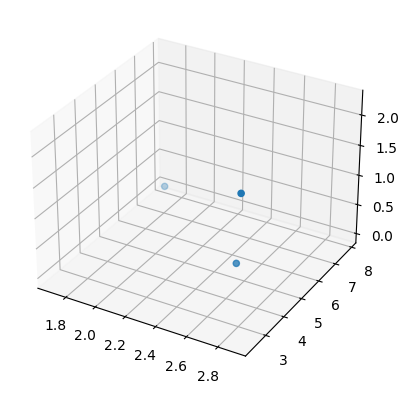

In [35]:
res_xx = [X_a[0], X_e[0], X_j[0]]
res_yy = [X_a[1], X_e[1], X_j[1]]
res_zz = [X_a[2], X_e[2], X_j[2]]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(res_xx, res_yy, res_zz)

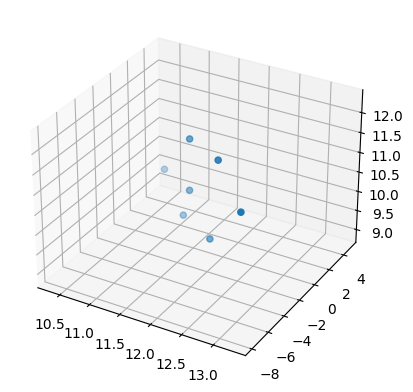

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(res_x, res_y, res_z)